In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.models.segmentation import fcn_resnet50
from PIL import Image
import os

In [ ]:
class CustomSegmentationDataset(Dataset):
    def init(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def len(self):
        return len(self.images)

    def getitem(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx])
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Маска в градаціях сірого

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask
image_dir = 'path_to_images/'
mask_dir = 'path_to_masks/'
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [ ]:
model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, masks in dataloader:
            images = images.cuda()
            masks = masks.cuda()
            outputs = model(images)['out']
            loss = criterion(outputs, masks.long())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Епоха {epoch+1}/{num_epochs}, Втрата: {running_loss/len(dataloader)}")


In [2]:
train_model(model, dataloader, criterion, optimizer, num_epochs=150)

Початок навчання моделі...

Епоха 1/150, Втрата: 1.9513, Точність: 50.33%
Епоха 2/150, Втрата: 1.9153, Точність: 50.74%
Епоха 3/150, Втрата: 1.8857, Точність: 51.04%
Епоха 4/150, Втрата: 1.8497, Точність: 51.44%
Епоха 5/150, Втрата: 1.8054, Точність: 51.82%
Епоха 6/150, Втрата: 1.7823, Точність: 52.07%
Епоха 7/150, Втрата: 1.7484, Точність: 52.56%
Епоха 8/150, Втрата: 1.7103, Точність: 52.91%
Епоха 9/150, Втрата: 1.6817, Точність: 53.37%
Епоха 10/150, Втрата: 1.6572, Точність: 53.48%
Епоха 11/150, Втрата: 1.6449, Точність: 53.84%
Епоха 12/150, Втрата: 1.6010, Точність: 54.30%
Епоха 13/150, Втрата: 1.5884, Точність: 54.48%
Епоха 14/150, Втрата: 1.5537, Точність: 54.84%
Епоха 15/150, Втрата: 1.5057, Точність: 55.01%
Епоха 16/150, Втрата: 1.4751, Точність: 55.20%
Епоха 17/150, Втрата: 1.4302, Точність: 55.46%
Епоха 18/150, Втрата: 1.3816, Точність: 55.61%
Епоха 19/150, Втрата: 1.3446, Точність: 55.77%
Епоха 20/150, Втрата: 1.3220, Точність: 56.03%
Епоха 21/150, Втрата: 1.2949, Точність: 5

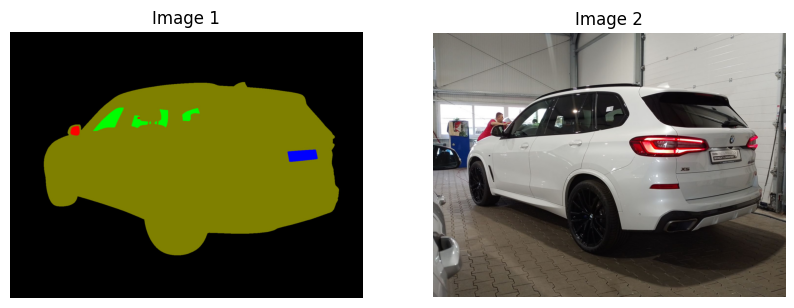

In [9]:
colors = [[0,0,0], [128,128,0],[0,255,0],[0,0, 255],[255,0,0]]
result_image = np.zeros((self.mask_.shape[1], self.mask_.shape[2], 3))
for i in range(5):
    result_image[self.mask_[i] == 1] = colors[i]

Image.fromarray(result_image.astype(np.uint8)).save(r'C:\Users\yarik\Downloads\test1.png')

# plt.subplot(1, 2, 1)
# plt.imshow(image1_rgb)
# plt.axis('off')  # Hide the axes
# plt.title("Image 1")

# # Display the second image
# plt.subplot(1, 2, 2)
# plt.imshow(image2_rgb)
# plt.axis('off')  # Hide the axes
# plt.title("Image 2")

# # Show the images
# plt.show()
